# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [144]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv('apartments_clean.csv')
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,area_comfort
0,140000.0,2.0,2258.0,7.0,9.0,1969.000000,62.0,47.000000,9.000000,Омеляновича-Павленка,6.00000
1,105000.0,4.0,847.0,25.0,26.0,2018.000000,124.0,71.000000,16.000000,Ованеса Туманяна,37.00000
2,175000.0,3.0,1786.0,25.0,26.0,2010.000000,98.0,42.613883,15.907787,Ованеса Туманяна,39.47833
3,30970.0,1.0,1106.0,12.0,13.0,2013.000000,28.0,13.000000,5.000000,Петропавлівська,10.00000
4,82000.0,2.0,1281.0,18.0,26.0,1996.307385,64.0,42.613883,15.907787,Дніпровська,5.47833


## 1. Визначення типів покажчиків вхідного датасету

In [145]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = pd.DataFrame(data['Price'])
data = data.drop(columns = 'Price')

In [146]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((676, 1), (676, 10))

In [147]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as selector

In [62]:
# побудувати селектори для відбору числових та категоріальних колонок
numeric_selector = selector(dtype_include = np.number)
category_selector = selector(dtype_include = 'object')

In [64]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street']


In [76]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data[numeric_data_columns]
data_category = data[category_data_columns]

data_numeric.shape, data_category.shape

((676, 9), (676, 1))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [12]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [46]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max = min_max_scaler.fit_transform(data_numeric)

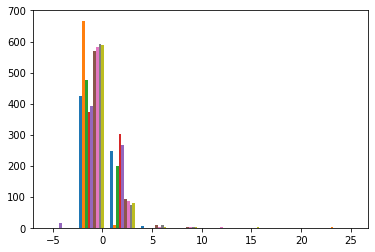

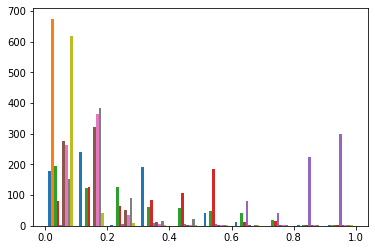

In [50]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні
import matplotlib.pyplot as plt
plt.hist(data_numeric_std)
plt.show()
plt.hist(data_numeric_min_max)
plt.show()

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.1. Маштабування категоріальних показчиків

In [52]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

<p>Проаналізувати категоріальні показчики та визначитись до якого показчика який енкодер доцільно застосовувати</p>
<p>Ми маємо лише одну колонку з категоріальними даними - 'street'. Дані не є ординальними (не мають природнього зв'язку), тобто доцільно застосувати OneHotEncoder.</p>

In [53]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = OrdinalEncoder().fit_transform(data_category)
one_hot_encoder = OneHotEncoder(sparse_output = False).fit_transform(data_category)

## 3. Побудова трансформера для підготовки даних

In [54]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [112]:
numeric_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [113]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
transformer = ColumnTransformer([
 ('categorical_encoder', categorical_preprocessor, category_data_columns),
 ('numeric_encoder', numeric_preprocessor, numeric_data_columns)
],
remainder="drop"
)
transformer

ColumnTransformer(transformers=[('categorical_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['street']),
                                ('numeric_encoder', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen', 'area_comfort'])])

In [121]:
# отримати вихідний масив застосував трансфомер до вхідного датасету
data_transformed = transformer.fit_transform(data)
data_transformed.shape
data_transformed = pd.DataFrame(data_transformed)
data_transformed

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,0.028918,-0.376909,-1.038003,-1.155844e+00,-0.375911,1.701690e-01,-8.146694e-01,-0.600406
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.714171,-0.203400,2.278198,1.008098,9.181869e-01,0.907133,1.101301e+00,1.087515e-02,0.432625
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.742084,-0.048796,2.278198,1.008098,5.795696e-01,0.369082,-2.756706e-16,-2.094945e-16,0.515212
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.202090,-0.160756,0.360620,-0.556567,7.065511e-01,-1.079515,-1.148935e+00,-1.286409e+00,-0.467112
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,-0.131943,1.245656,1.008098,-9.624084e-15,-0.334522,-2.756706e-16,-2.094945e-16,-0.617790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,0.028588,-0.524415,-1.038003,-9.624084e-15,0.037974,-2.953972e-01,9.543546e-01,-0.033905
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.742084,-0.218218,-0.229403,-1.038003,-8.595541e-01,-0.293134,9.257463e-02,-9.326043e-01,-0.367141
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.202090,0.042748,-0.376909,-0.315850,-9.624084e-15,-0.872573,-8.773550e-01,-1.050539e+00,-0.433788
674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,0.094447,-0.671921,-1.278720,-2.044715e+00,-0.334522,-2.756706e-16,-8.146694e-01,-0.387598


In [93]:
from sklearn.pipeline import Pipeline

In [102]:
pipe = Pipeline(steps=[('column transformer', transformer)])
pipe

Pipeline(steps=[('column transformer',
                 ColumnTransformer(transformers=[('categorical_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['street']),
                                                 ('numeric_encoder',
                                                  StandardScaler(),
                                                  ['rooms', 'price_per_m2',
                                                   'level', 'levels', 'year',
                                                   'area_total', 'area_living',
                                                   'area_kitchen',
                                                   'area_comfort'])]))])

In [101]:
pipe.fit_transform(data).shape

(676, 278)

In [148]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
apartment_transformed = target.join(data_transformed, on = None, how='left', lsuffix='', rsuffix='', sort=False)
apartment_transformed

,Price,0,1,2,3,4,5,6,7,8,...,268,269,270,271,272,273,274,275,276,277
0,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,0.028918,-0.376909,-1.038003,-1.155844e+00,-0.375911,1.701690e-01,-8.146694e-01,-0.600406
1,105000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.714171,-0.203400,2.278198,1.008098,9.181869e-01,0.907133,1.101301e+00,1.087515e-02,0.432625
2,175000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.742084,-0.048796,2.278198,1.008098,5.795696e-01,0.369082,-2.756706e-16,-2.094945e-16,0.515212
3,30970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.202090,-0.160756,0.360620,-0.556567,7.065511e-01,-1.079515,-1.148935e+00,-1.286409e+00,-0.467112
4,82000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,-0.131943,1.245656,1.008098,-9.624084e-15,-0.334522,-2.756706e-16,-2.094945e-16,-0.617790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,185000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,0.028588,-0.524415,-1.038003,-9.624084e-15,0.037974,-2.953972e-01,9.543546e-01,-0.033905
672,49990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.742084,-0.218218,-0.229403,-1.038003,-8.595541e-01,-0.293134,9.257463e-02,-9.326043e-01,-0.367141
673,89000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.202090,0.042748,-0.376909,-0.315850,-9.624084e-15,-0.872573,-8.773550e-01,-1.050539e+00,-0.433788
674,170000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.230003,0.094447,-0.671921,-1.278720,-2.044715e+00,-0.334522,-2.756706e-16,-8.146694e-01,-0.387598


In [152]:
# Проінспектувати вихідний датасет `apartment_transformed`
apartment_transformed.describe()

,Price,0,1,2,3,4,5,6,7,8,...,268,269,270,271,272,273,274,275,276,277
count,6.760000e+02,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02
mean,1.980334e+05,0.007396,0.001479,0.005917,0.001479,0.002959,0.002959,0.001479,0.001479,0.001479,...,0.002959,3.021909e-17,-7.094916e-17,1.077376e-16,1.208764e-16,-7.218420e-15,2.128475e-16,-6.832142e-17,-1.708035e-17,8.408790e-17
std,6.797337e+05,0.085747,0.038462,0.076752,0.038462,0.054353,0.054353,0.038462,0.038462,0.038462,...,0.054353,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00
min,1.009210e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.202090e+00,-2.641547e-01,-1.261945e+00,-1.880515e+00,-5.769505e+00,-1.348540e+00,-1.265327e+00,-1.522279e+00,-8.003473e-01
25%,6.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.202090e+00,-1.540262e-01,-8.194274e-01,-1.038003e+00,-5.533791e-02,-5.828532e-01,-4.893832e-01,-5.787995e-01,-4.337880e-01
50%,1.034500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.300027e-01,-8.748808e-02,-2.294035e-01,0.000000e+00,-9.624084e-15,-1.068855e-01,-2.756706e-16,-2.094945e-16,-2.005230e-01
75%,1.689018e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.420842e-01,1.249814e-02,6.556324e-01,8.877388e-01,7.912054e-01,1.828341e-01,1.498026e-02,1.087515e-02,9.938907e-02
max,1.570000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.630432e+00,2.550678e+01,3.458246e+00,3.535633e+00,1.045168e+00,9.102056e+00,1.076180e+01,7.322841e+00,1.444139e+01


In [151]:
apartment_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Columns: 279 entries, Price to 277
dtypes: float64(279)
memory usage: 1.4 MB


In [153]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv')